<a href="https://colab.research.google.com/github/CJRicciardi/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/DS_Unit_1_Sprint_Challenge_1_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 1 - Load and Explore the Data

Run the cell below to load the datasets into three dataframes and then follow the instructions below


In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

geo_country_codes = geo_country_codes[['geo','country']]

In [0]:
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


Check for missing/null values in the three dataframes

In [0]:
# view the heads
geo_country_codes.head()

,geo,country
0,abkh,Abkhazia
1,abw,Aruba
2,afg,Afghanistan
3,ago,Angola
4,aia,Anguilla


In [0]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [0]:
#check for missing data
population.isna().sum()

geo                 0
time                0
population_total    0
dtype: int64

In [0]:
geo_country_codes.isna().sum()

geo        0
country    0
dtype: int64

In [0]:
cell_phones.isna().sum()

geo                  0
time                 0
cell_phones_total    0
dtype: int64

Make a scatter plot from the `cell_phones` dataframe plotting "time" against "cell_phones_total"

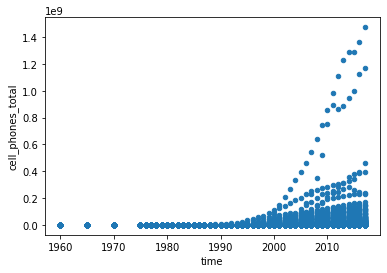

In [0]:
# Your Work Here
#make a scatter plot
cell_phones.plot.scatter('time', 'cell_phones_total')

### Part 2 - Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [0]:
# Your Work Here
#merge cell_phones and population 

cell_pop = pd.merge(cell_phones, population, how='inner', on=['geo','time'])

cell_pop.head()

,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996351
1,afg,1965,0.0,9938414
2,afg,1970,0.0,11126123
3,afg,1975,0.0,12590286
4,afg,1976,0.0,12840299


Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [0]:
# Your Work Here
#final merge to get all data in one df

cell_df = pd.merge(cell_pop, geo_country_codes, on='geo')

cell_df.head()

,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996351,Afghanistan
1,afg,1965,0.0,9938414,Afghanistan
2,afg,1970,0.0,11126123,Afghanistan
3,afg,1975,0.0,12590286,Afghanistan
4,afg,1976,0.0,12840299,Afghanistan


In [0]:
#check work

cell_df.shape

(8590, 5)

### Part 3 - Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [149]:
# Your Work Here 


cell_df['Cell_per_capita'] = cell_df['cell_phones_total'] /  cell_df['population_total']

cell_df.head(50)

,geo,time,cell_phones_total,population_total,country,Cell_per_capita
0,afg,1960,0.0,8996351,Afghanistan,0.000000
1,afg,1965,0.0,9938414,Afghanistan,0.000000
2,afg,1970,0.0,11126123,Afghanistan,0.000000
3,afg,1975,0.0,12590286,Afghanistan,0.000000
4,afg,1976,0.0,12840299,Afghanistan,0.000000
5,afg,1977,0.0,13067538,Afghanistan,0.000000
6,afg,1978,0.0,13237734,Afghanistan,0.000000
7,afg,1979,0.0,13306695,Afghanistan,0.000000
8,afg,1980,0.0,13248370,Afghanistan,0.000000
9,afg,1981,0.0,13053954,Afghanistan,0.000000


### Part 4 - Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [0]:
cell_df.describe()

,time,cell_phones_total,population_total,Cell_per_capita
count,8590.000000,8.590000e+03,8.590000e+03,8590.000000
mean,1994.193481,9.004950e+06,2.983823e+07,0.279639
std,14.257975,5.573408e+07,1.161284e+08,0.454247
min,1960.000000,0.000000e+00,4.433000e+03,0.000000
25%,1983.000000,0.000000e+00,1.456148e+06,0.000000
50%,1995.000000,6.200000e+03,5.725062e+06,0.001564
75%,2006.000000,1.697652e+06,1.810581e+07,0.461149
max,2017.000000,1.474097e+09,1.409517e+09,2.490243


In [0]:
import numpy as np

cell_df.describe(include=[np.object])

,geo,country
count,8590,8590
unique,195,195
top,sen,Honduras
freq,46,46


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |


In [0]:
# Your Work Here
cell_df.nlargest(5, 'population_total', keep='last')

,geo,time,cell_phones_total,population_total,country,Cell_per_capita
1496,chn,2017,1.474097e+09,1409517397,China,1.045817
1495,chn,2016,1.364934e+09,1403500365,China,0.972521
1494,chn,2015,1.291984e+09,1397028553,China,0.924809
1493,chn,2014,1.286093e+09,1390110388,China,0.925173
1492,chn,2013,1.229113e+09,1382793212,China,0.888862


# Your Work Here
cell_df.describe()

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

cable_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/cable_weekly.csv'
online_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/online_weekly.csv'

cable = pd.read_csv(cable_news_url)
online = pd.read_csv(online_news_url)

merged = pd.merge(cable[['date', 'name', 'pct_of_all_candidate_clips']], online[['date', 'name', 'pct_of_all_candidate_stories']])
merged['date'] = pd.to_datetime(merged['date'], infer_datetime_format=True)
merged = merged.set_index('date')

unique_dates = list(set(merged.index.to_list()))

import datetime

joe_biden_cable_multiple = []
joe_biden_online_multiple = []

for date in unique_dates:
  that_day = merged.loc[datetime.date(year=date.year, month=date.month, day=date.day)]

  joe_biden_cable_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_clips']
  not_joe_biden_cable_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_clips'].max()
  joe_biden_cable_multiple_of_max = joe_biden_cable_that_day / not_joe_biden_cable_max

  joe_biden_online_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_stories']
  not_joe_biden_online_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_stories'].max()
  joe_biden_online_multiple_of_max = joe_biden_online_that_day / not_joe_biden_online_max


  joe_biden_cable_multiple.append(joe_biden_cable_multiple_of_max.values[0])
  joe_biden_online_multiple.append(joe_biden_online_multiple_of_max.values[0])

df = pd.DataFrame({'date': unique_dates, 'biden_cable_multiple':joe_biden_cable_multiple, 'biden_online_multiple': joe_biden_online_multiple})
df = df.set_index('date')
df = df.sort_index()

data_for_graph = df.loc[datetime.date(2019, 4, 15):]
print(data_for_graph.shape)
data_for_graph.head()

(27, 2)


,biden_cable_multiple,biden_online_multiple
date,,
2019-04-21,3.087352,1.107492
2019-04-28,3.707641,1.295820
2019-05-05,2.805169,1.306122
2019-05-12,3.235849,1.045386
2019-05-19,2.494624,1.119588


### Part 1 — Recreate this explanatory visualization:



**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.

**Expectations:** Your plot should include:
- 2 lines visualizing the Cable news vs Online news lines The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend **or** labels for the lines. (But **you don't need each label positioned next to its line or colored like 538.**)
- Title in the upper left: _"Biden's Ukraine-related media bump is fading"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Biden's share of media mentions on each medium relative ot the next most-mentioned candidate each week"_

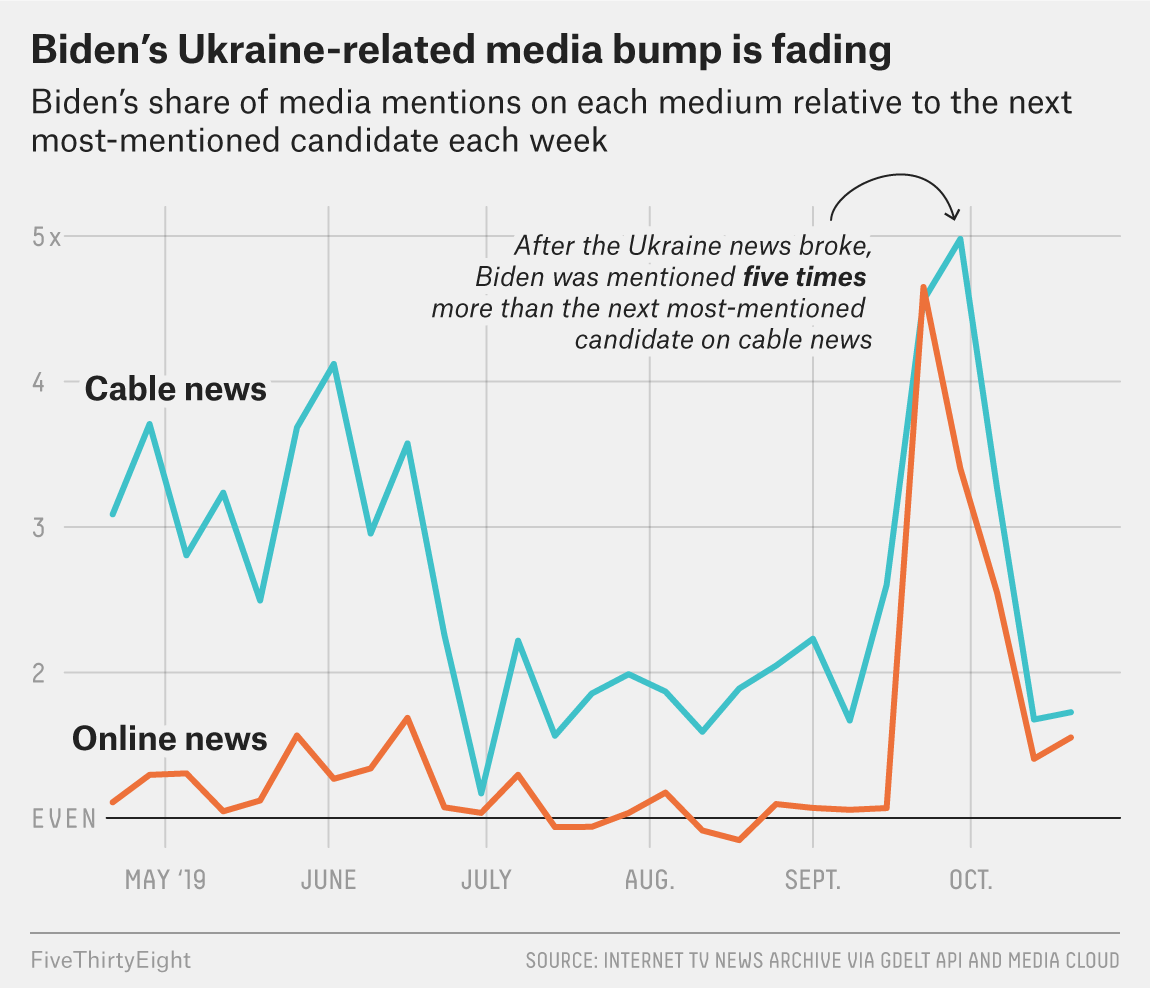

In [0]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2019/10/Mehta-Media1028-1028-1.png'
example = Image(png, width=500)
display(example)

In [0]:
list(data_for_graph.columns.values)

['biden_cable_multiple', 'biden_online_multiple']

In [62]:
#get date to be a column
data_for_graph['date'] = data_for_graph.index
data_for_graph.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,biden_cable_multiple,biden_online_multiple,date
date,,,
2019-04-21,3.087352,1.107492,2019-04-21
2019-04-28,3.707641,1.295820,2019-04-28
2019-05-05,2.805169,1.306122,2019-05-05
2019-05-12,3.235849,1.045386,2019-05-12
2019-05-19,2.494624,1.119588,2019-05-19


In [0]:
#Your work here

Text(0.85, 0.617, 'After the Ukraine news broke \n Biden was mentioned five times \n more than the next most-mentioned \n candidate on cable news ')

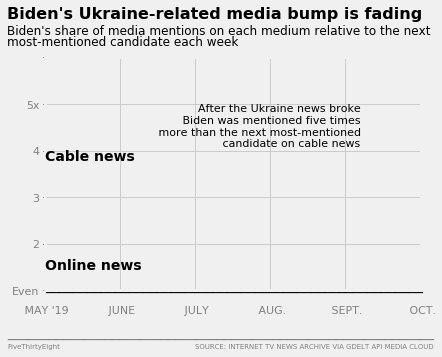

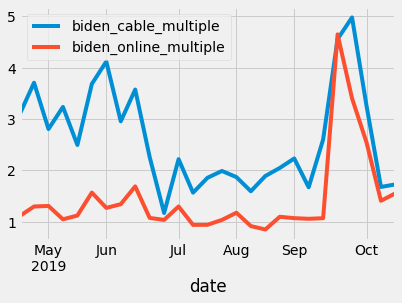

In [136]:
#set style

plt.style.use('fivethirtyeight')

#greate graph

fig, ax = plt.subplots()

data_for_graph.plot.line(x='date', 
                         y=['biden_cable_multiple','biden_online_multiple']);

#title
ax.set_title("Biden's Ukraine-related media bump is fading", loc='left',
             c='black', fontsize='16', fontweight='bold', x=-.1, y=1.14);

#sub-title
ax.text(s="Biden's share of media mentions on each medium relative to the next",
        color='black', fontsize=12, x=-.1,y=1.1)
ax.text(s="most-mentioned candidate each week", fontsize=12, x=-.1, y=1.05)

#y-ticks
ax.set_yticklabels(labels=['Even', 2,3,4,'5x'], 
                   color='gray', fontsize=11, fontweight='ultralight')

#x-ticks
ax.set_xticklabels(labels=["\n MAY '19", '\n JUNE', '\n JULY', '\n AUG.',
                           '\n SEPT.', '\n OCT.'], 
                   color='gray', rotation='horizontal', fontsize=11, 
                   fontweight='ultralight')
ax.text(s='______________________________________________________',
        color='black',
        weight='ultralight', x=0, y=0)

# set y margin
ax.tick_params(axis='y', length=2, bottom=True)

#line lable text
ax.text(s='Cable news', color='black', weight='bold', size=14, x=0, y=.56)
ax.text(s='Online news', color='black', weight='bold', size=14, x=0, y=.09)

#bottom text
ax.text(s='FiveThirtyEight', color='gray', weight='ultralight', size=7,
        x=-.1, y=-.25)
ax.text(s='SOURCE: INTERNET TV NEWS ARCHIVE VIA GDELT API MEDIA CLOUD', size=7, 
        weight='ultralight', x=.4, y=-.25, color='gray')
ax.text(s='_____________________________________________________________',
        color='gray', y=-.2, x=-.1, weight='light')

#blurb text
ax.text(s='After the Ukraine news broke \n Biden was mentioned five times \n more than the next most-mentioned \n candidate on cable news ',
        horizontalalignment='right', size=11, x=.85, y=.617)

#F*@$!!!  I googled for like thirty minutes to figure out how to get rid of the
#two graph problem, and got nowhere. Tried all sorts of things and no 
#improvement, so hopefully this is still a 2.  I'd tweak a few more things, but 
#I don't think there is any point in showing code that doesn't actually improve 
#anything.

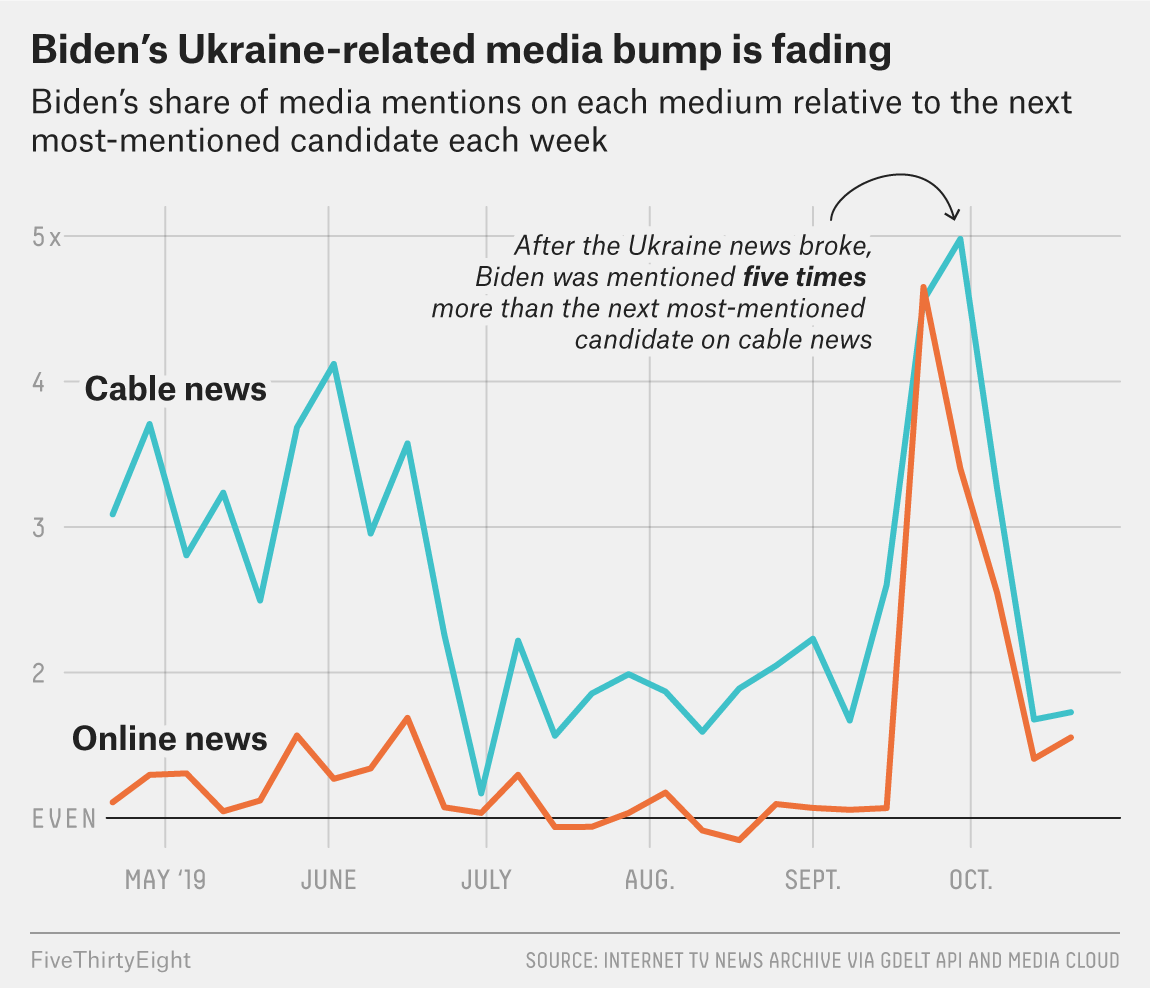

In [0]:
display(example)

## How to get a 3 on this Sprint Challenge:

Once you have completed the above making a solid attempt at each section, if you still have time remaining, you can go back and do any of the following to get a score of 3 on the above sections. Remember that everything in this section is **optional** and that we will average your scores between the different sections, so get the easy points first!

Complete any of the following **within** their corresponding sections in the Sprint Challenge (go back up and add these thigns):

### Data Wrangling Section 1

Filter the `cell_phones` dataframe to only include information about the USA and China and then remake the scatterplot. 

### Data Wrangling Section 2

Explain why we are using an "inner" join when we merge these dataframes. 

### Data Wrangling Section 3

Modify the geo column to make the geo codes uppercase instead of lowercase.

### Data Wrangling Section 4

2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

### Data Storytelling 

Keep on working on your graph to make it look particularly like the 538 graph by manipulating the graph's background color, the line colors, the x and y axis tick marks/labels, etc. 

If you have already completed everything else, take this as far as you can within the time limit.
